# Projektarbeit Gruppe 2: Gesundheitsdaten

https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

Macht es Sinn die Zielvariable Hypertonie zu verwenden? Bei der Regression benötigt man nummerische Werte, Hypertonie ist eine Klasse (?) 0, 1, 2 macht hierfür keinen Sinn. Eventuell wäre es sinnvoller eine Zielvariable wie das Gewicht zu nehmen. Als weitere Features nimmt man dann alles, wo man nicht weiß, dass es mit dem Gewicht zu tun hat. Also BMI würde nicht gehen, weil man dadurch einfach nur die BMI Formel rückwerts macht. 

In [36]:
# Import der benötigten Bibliotheken

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as RMSE

In [2]:
# Neuer Datensatz
path = str(os.getcwd()).replace("\Projektarbeit\Aufgaben", "")

# Lesen der CSV Datei:
dataset = pd.read_csv(path + '\dataset_custom.csv')

# Trennung in des Dataset in Frauen und Männer
data_m = dataset[dataset['Geschlecht'] == 0]

data_f = dataset[dataset['Geschlecht'] == 1]

# Anforderungen 8: Regression

Entscheiden Sie, ob Sie mit der linearen Regression modellieren, prädizieren, oder beides erreichen wollen.

### Modellierung:

In [4]:
# Für dieses Notebook wird der Ansatz der Modellierung gewählt, da in vorherigen Notebook eine Softmax Regression durchgeführt wurde, die in  
# Teilen bereits prädiziert und keine befriedigenden Ergebnisse geliefert hat. Durch Modellierung wird versucht neue und tiefgreifendere Erkentnisse 
# zu gewinnen. Ziel wäre es beispielsweise Aussagen treffen zu können wie: "Personen mit dem Merkmal X neigen dazu an Hypertonie erkrankt zu sein". 

# Als Zielvariable wird das Feature "Gewicht" gewählt, da es sich dabei um einen numerischen Wert handelt und das Feature auch ohne spezifisches Fachwissen verstanden werden kann. 

Führen Sie die entsprechende(n) Analyse(n) methodisch sauber durch und berichten Sie entsprechend der    eingeführten Kriterien und Evaluationsmaße das Ergebnis.

In [5]:
# Zunächst wird nur der Vergleich zwischen Gewicht und Hüftumfang angeschaut, hierbei werden die Analysen für Männer und Frauen getrennt voneinander durchgeführt. 
# Männer 
gewicht_1m= ols("Gewicht ~ Hüftumfang", data_m).fit()

print(gewicht_1m.summary())

                            OLS Regression Results                            
Dep. Variable:                Gewicht   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                 7.581e+05
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        08:33:01   Log-Likelihood:            -1.7842e+06
No. Observations:              526415   AIC:                         3.568e+06
Df Residuals:                  526413   BIC:                         3.568e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.1470      0.103   -185.885      0.0

In [6]:
# Das Modell versucht, die Beziehung zwischen der abängige Variable (Gewicht) und der unabhängigen Variablen 
# (Hüftumfang) zu modellieren, um zu verstehen, wie diese Variable das Gewicht beeinflussen könnte.

# Das Bestimmtheitsmaß erzielt einen Wert von 59%. Nachdem redizieren erhält man eine Korrelation von 0.77 für den Datensatz der 
# Männer. 

In [7]:
# Frauen 
gewicht_1f= ols("Gewicht ~ Hüftumfang", data_f).fit()

print(gewicht_1f.summary())

                            OLS Regression Results                            
Dep. Variable:                Gewicht   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                 4.699e+05
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        08:33:07   Log-Likelihood:            -1.5121e+06
No. Observations:              464874   AIC:                         3.024e+06
Df Residuals:                  464872   BIC:                         3.024e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6440      0.078     34.028      0.0

In [8]:
# Das Bestimmtheitsmaß erzielt einen Wert von 50,3%. Nachdem redizieren erhält man eine Korrelation von 0.71 für den Datensatz der 
# Frauen. 

# Es zeigt sich, dass trotz selber Parameter die Korrelation bei den Männern etwas höher ist als bei den Frauen.

In [9]:
# In einem nächsten Schritt werden zunächst einmal intuitiv weitere Features hinzugenommen um zu untersuchen, wie sich diese auswirken: 

#Männer 
gewicht_full_m= ols("Gewicht ~ Hüftumfang + Größe + Alter + LDL_Cholesterin", data_m).fit()

print(gewicht_full_m.summary())

                            OLS Regression Results                            
Dep. Variable:                Gewicht   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                 4.872e+05
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        08:33:12   Log-Likelihood:            -1.6116e+06
No. Observations:              526415   AIC:                         3.223e+06
Df Residuals:                  526410   BIC:                         3.223e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -99.0429      0.223   -4

In [10]:
# Das Bestimmtheitsmaß erzielt einen Wert von 78,7%. Nachdem redizieren erhält man eine Korrelation von 0.89 für den Datensatz der 
# Männer. 

In [11]:
# Frauen 
gewicht_full_f= ols("Gewicht ~ Hüftumfang + Größe + Alter + LDL_Cholesterin", data_f).fit()

print(gewicht_full_f.summary())

                            OLS Regression Results                            
Dep. Variable:                Gewicht   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                 2.508e+05
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        08:33:19   Log-Likelihood:            -1.4072e+06
No. Observations:              464874   AIC:                         2.814e+06
Df Residuals:                  464869   BIC:                         2.814e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -74.8863      0.233   -3

In [12]:
# Das Bestimmtheitsmaß erzielt einen Wert von 68,3%. Nachdem redizieren erhält man eine Korrelation von 0.83 für den Datensatz der 
# Frauen. 

In [13]:
# Modellvergleich mit ANOVA 

anova_results = anova_lm(gewicht_1m, gewicht_full_m)

print('\nANOVA results')
print(anova_results)


ANOVA results
   df_resid           ssr  df_diff       ss_diff              F  Pr(>F)
0  526413.0  2.709126e+07      0.0           NaN            NaN     NaN
1  526410.0  1.405955e+07      3.0  1.303171e+07  162642.104067     0.0


In [14]:
# In dieser Analyse werden die beiden Auswertungen gewicht_1m und gewicht_full_m untersucht um festzustellen, ob die Hinzunahme von mereren Features wirklich eine höhere Aussagekraft liefert. 

Wenn Sie sowohl modellieren als auch prädizieren wollen, führen Sie die Modellierung nur auf den Trainingsdaten durch, um zu vermeiden, dass Sie ungewollt aus Ihren Testdaten lernen. Trainieren Sie das Prädiktionsmodell im zweiten Schritt aufgrund der Erkenntnisse der Modellierung.

In [15]:
# In einem nächsten Schritt geht es darum, einen Fachexperten aus dem medizimnischen Kontext zu befragen, welche Features sich für weitere Untersuhungen eignen würden. 

In [16]:

# coef erklärt die gewichtung also z.b wenn man trinker ist steigt der hüftumfang um faktor 1,5. wenn man raucher war sinkt er um 0,8 

### Prädiktion:

Führen Sie die entsprechende(n) Analyse(n) methodisch sauber durch und berichten Sie entsprechend der eingeführten Kriterien und Evaluationsmaße das Ergebnis.

In [ ]:
# Zusätzlich zur Modellierung wird auch eine Prädiktion durchgeführt. Hier soll das Gewicht eines Probanden vorausgesagt werden. 
# Um auch hier auf die biologischen Unterschiede zwischen den Geschlechtern zu achten, wird der Datensatz ebenso getrennt:

In [28]:
# Neuer Datensatz
path = str(os.getcwd()).replace("\Projektarbeit\Aufgaben", "")

# Lesen der CSV Datei:
dataset = pd.read_csv(path + '\dataset_custom.csv')

dataset = dataset.drop('Unnamed: 0', axis=1)
dataset = dataset.drop('Body-Mass-Index', axis=1)

# Trennung in des Dataset in Frauen und Männer
data_m = dataset[dataset['Geschlecht'] == 0]

data_f = dataset[dataset['Geschlecht'] == 1]

data_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526415 entries, 0 to 991288
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Geschlecht             526415 non-null  int64  
 1   Alter                  526415 non-null  int64  
 2   Größe                  526415 non-null  int64  
 3   Gewicht                526415 non-null  int64  
 4   Hüftumfang             526415 non-null  float64
 5   Nüchterner Blutzucker  526415 non-null  float64
 6   Totale Cholesterin     526415 non-null  float64
 7   HDL_Cholesterin        526415 non-null  float64
 8   LDL_Cholesterin        526415 non-null  float64
 9   Triglycerid            526415 non-null  float64
 10  Hämoglobin             526415 non-null  float64
 11  SGOT_AST               526415 non-null  float64
 12  SGOT_ALT               526415 non-null  float64
 13  gamma_GTP              526415 non-null  float64
 14  BD_optimal             526415 non-null  i

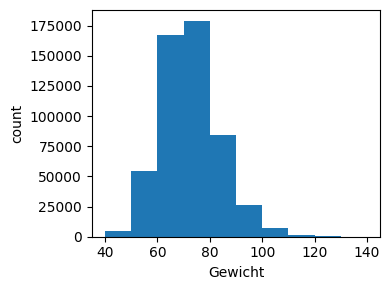

In [25]:
# Daten (männlich):

plt.figure(figsize=(4, 3))
plt.hist(data_m['Gewicht'])
plt.xlabel('Gewicht')
plt.ylabel('count')
plt.tight_layout()

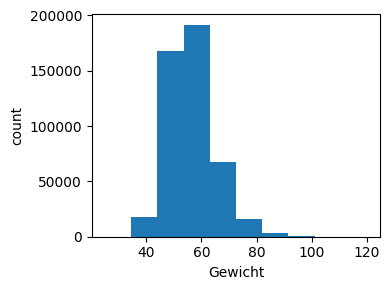

In [29]:
# Daten (weiblich):

plt.figure(figsize=(4, 3))
plt.hist(data_f['Gewicht'])
plt.xlabel('Gewicht')
plt.ylabel('count')
plt.tight_layout()

In [33]:
# Daten aufteilen: Testdaten
X_train, X_test, y_train, y_test = train_test_split(data_m.drop(columns=['Gewicht']), data_m['Gewicht'], test_size=0.25)

# Nicht-Testdaten weiter aufteilen: Training und Entwicklung
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.25)

print(len(X_train), len(X_test), len(X_dev), len(X_test))

296108 131604 98703 131604


In [37]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [39]:
LinearRegression()

print(clf.intercept_, clf.coef_)

-97.15204137789551 [ 0.00000000e+00 -1.57491446e-01  5.50513184e-01  9.40586816e-01
  1.21083873e-03  4.01301397e-03 -2.91936663e-02  1.12520445e-03
  1.16112574e-03  1.69446306e-01 -9.49291036e-03  1.94885795e-02
 -3.73138860e-03 -1.20574930e+00 -4.57863489e-01 -1.75814827e-01
  1.93989868e-01  7.11911429e-01  9.33526324e-01  6.68694277e-02
  2.41477374e-01 -3.08346802e-01  8.89020630e-02]


In [40]:
# Vorhersage machen und evaluieren
predicted = clf.predict(X_dev)
expected = y_dev


print("RMSE: ")
RMSE(expected, predicted)

RMSE: 


26.02923042833213

Wenn Sie sowohl modellieren als auch prädizieren wollen, führen Sie die Modellierung nur auf den Trainingsdaten durch, um zu vermeiden, dass Sie ungewollt aus Ihren Testdaten lernen. Trainieren Sie das Prädiktionsmodell im zweiten Schritt aufgrund der Erkenntnisse der Modellierung.